### This notebook loads an excel file as a pandas dataframe, performs EDA on it as seen in the plots, and saves cleaned file as .db file. 

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Excel Sheets as Dataframes 

In [3]:
df_products = pd.read_excel('/Users/tanchaud/CAB_Berlin/Module_2/Project_5/sales_original.xlsx', sheet_name='products')
df_stock = pd.read_excel('/Users/tanchaud/CAB_Berlin/Module_2/Project_5/sales_original.xlsx', sheet_name='stock')
df_assessment = pd.read_excel('/Users/tanchaud/CAB_Berlin/Module_2/Project_5/sales_original.xlsx', sheet_name='assessment')
df_invoices = pd.read_excel('/Users/tanchaud/CAB_Berlin/Module_2/Project_5/sales_original.xlsx', sheet_name='invoices')
df_customers = pd.read_excel('/Users/tanchaud/CAB_Berlin/Module_2/Project_5/sales_original.xlsx', sheet_name='customers')

#### Data Wrangling and EDA 

In [4]:
print(df_products.shape)
df_products.head()
df_products.isna().sum()

# check for uniqueness
df_products.ASIN.value_counts().sort_values(ascending=False).head()

# compare columns (ASIN, CustomerID) between all the tables to identify them as relational columns
df1 = df_invoices['CustomerID']
df2 = df_customers['CustomerID']

print(df1 == df2)
if(all(df1 == df2) == True):
    print('same')

(554417, 3)
0         True
1         True
2         True
3         True
4         True
          ... 
554412    True
554413    True
554414    True
554415    True
554416    True
Name: CustomerID, Length: 554417, dtype: bool
same


#### merging dataframes

In [5]:
##### Sales = Products + Stock
df_sales = pd.merge(df_products, df_stock['StockCode'], left_index=True, right_index = True)
df_sales.head()

,ASIN,title,product_type,StockCode
0,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703
1,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001
2,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A
3,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C
4,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726


In [6]:
# Sales = Sales + Assessment
df_sales = pd.merge(df_sales, df_assessment[['rating','review_count']], left_index=True, right_index=True)
df_sales.head()

,ASIN,title,product_type,StockCode,rating,review_count
0,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399
1,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289
2,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333
3,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86
4,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717


In [7]:
# Sales = Sales + Invoices
df_sales = pd.merge(df_sales, df_invoices[['InvoiceNo','Quantity','price','total_sale','invoice_date','invoice_time','CustomerID']], left_index=True,right_index=True)
df_sales.head()

,ASIN,title,product_type,StockCode,rating,review_count,InvoiceNo,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID
0,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,78536597,4,496.95,1987.80,2018-12-01,17,18011
1,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,78536597,4,39.99,159.96,2018-12-01,17,18011
2,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,78536597,1,12.99,12.99,2018-12-01,17,18011
3,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,78536597,1,199.99,199.99,2018-12-01,17,18011
4,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,78536597,1,7.49,7.49,2018-12-01,17,18011


In [8]:
df_sales = pd.merge(df_sales, df_customers[['Country']], left_index=True, right_index=True)

In [7]:
df_sales.dtypes

ASIN                    object
title                   object
product_type            object
StockCode               object
rating                 float64
review_count             int64
InvoiceNo               object
Quantity                 int64
price                  float64
total_sale             float64
invoice_date    datetime64[ns]
invoice_time             int64
CustomerID              object
Country                 object
dtype: object

In [9]:
df_sales['Year'] = df_sales['invoice_date'].dt.year
df_sales['Month'] = df_sales['invoice_date'].dt.month

In [10]:
df_sales['Day'] = df_sales['invoice_date'].dt.weekday

In [11]:
dict_days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_sales['Day of the Week'] = df_sales['Day'].replace(dict_days)

In [12]:
df_sales.head()

,ASIN,title,product_type,StockCode,rating,review_count,InvoiceNo,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID,Country,Year,Month,Day,Day of the Week
0,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,78536597,4,496.95,1987.80,2018-12-01,17,18011,Germany,2018,12,5,Sat
1,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,78536597,4,39.99,159.96,2018-12-01,17,18011,Germany,2018,12,5,Sat
2,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,78536597,1,12.99,12.99,2018-12-01,17,18011,Germany,2018,12,5,Sat
3,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,78536597,1,199.99,199.99,2018-12-01,17,18011,Germany,2018,12,5,Sat
4,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,78536597,1,7.49,7.49,2018-12-01,17,18011,Germany,2018,12,5,Sat


In [13]:
df_sales["invoice_date"].min(), df_sales["invoice_date"].max()

(Timestamp('2018-12-01 00:00:00'), Timestamp('2019-12-09 00:00:00'))

#### EDA: missing values handling

In [14]:
df_sales = df_sales.replace({'Null': None})

In [15]:
df_sales.isnull().sum()

ASIN                 8398
title                   0
product_type            0
StockCode               0
rating                  0
review_count            0
InvoiceNo               0
Quantity                0
price                   0
total_sale              0
invoice_date            0
invoice_time            0
CustomerID         139315
Country                 0
Year                    0
Month                   0
Day                     0
Day of the Week         0
dtype: int64

In [16]:
df_sales = df_sales.dropna(axis=0)

In [17]:
df_sales.shape

(409035, 18)

In [18]:
df_sales.columns

Index(['ASIN', 'title', 'product_type', 'StockCode', 'rating', 'review_count',
       'InvoiceNo', 'Quantity', 'price', 'total_sale', 'invoice_date',
       'invoice_time', 'CustomerID', 'Country', 'Year', 'Month', 'Day',
       'Day of the Week'],
      dtype='object')

In [19]:
df_sales.CustomerID = df_sales.CustomerID.astype('int64')

In [20]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409035 entries, 0 to 554416
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ASIN             409035 non-null  object        
 1   title            409035 non-null  object        
 2   product_type     409035 non-null  object        
 3   StockCode        409035 non-null  object        
 4   rating           409035 non-null  float64       
 5   review_count     409035 non-null  int64         
 6   InvoiceNo        409035 non-null  object        
 7   Quantity         409035 non-null  int64         
 8   price            409035 non-null  float64       
 9   total_sale       409035 non-null  float64       
 10  invoice_date     409035 non-null  datetime64[ns]
 11  invoice_time     409035 non-null  int64         
 12  CustomerID       409035 non-null  int64         
 13  Country          409035 non-null  object        
 14  Year             409

In [21]:
df_sales.to_excel("sales_clean.xlsx") 

#### Now, this excel file can be converted into a .db file with the script named excel_db.ipynb. The converted db file can then be loaded into a RDBMS to perform queries on it. 

#### EDA: Plots
##### This section analyses the cleaned sales data. The plots show the results of these analyses. 

In [22]:
df_sales = df_sales.set_index('invoice_date')

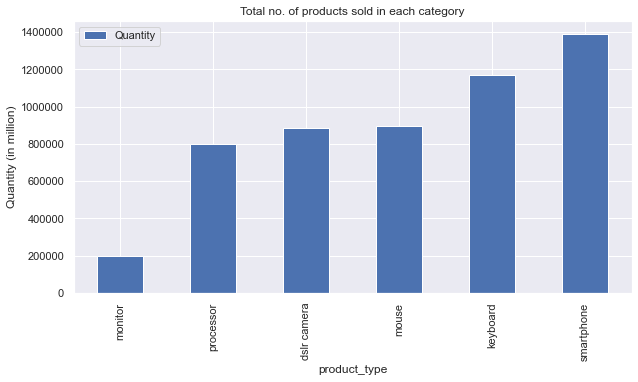

In [23]:
sns.set(rc = {'figure.figsize':(10,5)})

df_product_type = df_sales.groupby(by='product_type').sum()
df_product_type = df_product_type.sort_values(by='Quantity')
df_product_type[['Quantity']].plot(kind='bar')
plt.ylabel('Quantity (in million)')
plt.title('Total no. of products sold in each category')
plt.ticklabel_format(style = 'plain', axis='y')

##### In the plot above we can see, that smartphones were sold the most in comparison to monitor, which was sold the least during the time frame specified in the dataset. 

In [24]:
df_sales_month = df_sales.groupby(by='Month').sum()

In [25]:
df_sales_month.head()

,rating,review_count,Quantity,price,total_sale,invoice_time,CustomerID,Year,Day
Month,,,,,,,,,
1,94434.4,81245980,356907,2068237.33,33101647.35,276486,330144789,43967763,75854
2,88647.1,77581374,274162,1892421.04,26597892.72,254871,313058690,41246151,72898
3,120989.4,107459923,358875,2688386.54,36020794.46,348824,423942352,56336157,102262
4,100931.5,87719969,299890,2273849.47,30085641.29,292102,355570481,46994244,86188
5,126838.7,125488411,386505,2670828.68,37651560.92,365333,444160576,58872021,101601


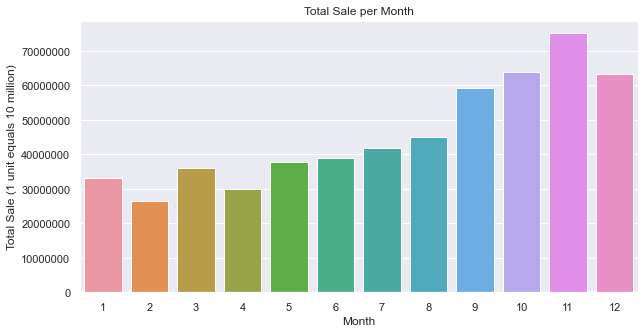

In [26]:
sns.barplot(data=df_sales_month, x=df_sales_month.index.values, y='total_sale')
plt.xlabel('Month')
plt.ylabel('Total Sale (1 unit equals 10 million)')
plt.title('Total Sale per Month')
plt.ticklabel_format(style = 'plain', axis='y')

##### As we see in the above plot, the total sale increased considerably before December, in the months of October and November. This could possibly due to the onset of the holiday season.

In [27]:
df_sales.head()

,ASIN,title,product_type,StockCode,rating,review_count,InvoiceNo,Quantity,price,total_sale,invoice_time,CustomerID,Country,Year,Month,Day,Day of the Week
invoice_date,,,,,,,,,,,,,,,,,
2018-12-01,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,78536597,4,496.95,1987.80,17,18011,Germany,2018,12,5,Sat
2018-12-01,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,78536597,4,39.99,159.96,17,18011,Germany,2018,12,5,Sat
2018-12-01,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,78536597,1,12.99,12.99,17,18011,Germany,2018,12,5,Sat
2018-12-01,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,78536597,1,199.99,199.99,17,18011,Germany,2018,12,5,Sat
2018-12-01,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,78536597,1,7.49,7.49,17,18011,Germany,2018,12,5,Sat


In [28]:
df_sales_daily = df_sales.groupby(by='Day of the Week').sum()
df_sales_daily = df_sales_daily.sort_values(by ='Day of the Week')

In [29]:
df_sales_daily.head()

,rating,review_count,Quantity,price,total_sale,invoice_time,CustomerID,Year,Month,Day
Day of the Week,,,,,,,,,,
Fri,296901.7,263026990,1039140,6750697.00,1.065660e+08,854651,1044272327,137930827,504160,273272
Mon,244692.7,215273208,846338,5512766.62,8.348996e+07,686858,854835836,113706804,428685,0
Sat,307948.4,270135527,989717,6961334.50,1.021993e+08,891452,1085363590,143076947,535726,354340
Sun,357407.6,321467622,1184705,8061797.14,1.275150e+08,1091193,1256245163,166028576,625685,493416
Thur,290065.5,251073121,792863,6476306.64,7.989361e+07,846416,1020535394,134780248,513099,200274


Text(0.5, 1.0, 'Sales during the week')

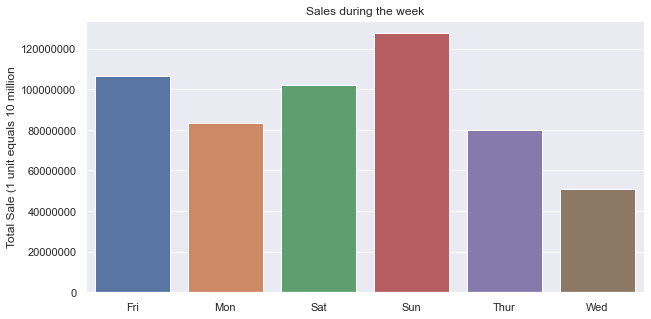

In [30]:
sns.barplot(data=df_sales_daily, x=df_sales_daily.index.values, y='total_sale')
plt.ticklabel_format(style = 'plain', axis='y')
plt.ylabel('Total Sale (1 unit equals 10 million')
plt.title('Sales during the week')

##### Sales increases to the maximum on Sundays.

In [31]:
df_sales = df_sales.drop(['Day'], axis=1)

In [32]:
df_sales.head()

,ASIN,title,product_type,StockCode,rating,review_count,InvoiceNo,Quantity,price,total_sale,invoice_time,CustomerID,Country,Year,Month,Day of the Week
invoice_date,,,,,,,,,,,,,,,,
2018-12-01,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,78536597,4,496.95,1987.80,17,18011,Germany,2018,12,Sat
2018-12-01,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,78536597,4,39.99,159.96,17,18011,Germany,2018,12,Sat
2018-12-01,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,78536597,1,12.99,12.99,17,18011,Germany,2018,12,Sat
2018-12-01,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,78536597,1,199.99,199.99,17,18011,Germany,2018,12,Sat
2018-12-01,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,78536597,1,7.49,7.49,17,18011,Germany,2018,12,Sat


In [33]:
df_sales['Country'].unique()

array(['Germany', 'Ireland', 'Norway', 'Australia', 'France',
       'United Kingdom', 'Netherlands', 'Italy', 'Portugal', 'Poland',
       'Switzerland', 'Belgium', 'Spain', 'Japan', 'Lithuania', 'Iceland',
       'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece',
       'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unknown', 'Brazil',
       'United States', 'European Community', 'Bahrain', 'Malta',
       'South Africa'], dtype=object)

In [34]:
df_sales_country = df_sales.groupby(by='Country').sum()
df_sales_country = df_sales_country.sort_values(by='Quantity',ascending=False)
df_sales_country = df_sales_country.iloc[1:11]

Text(0.5, 1.0, 'Top Ten Countries with highest orders')

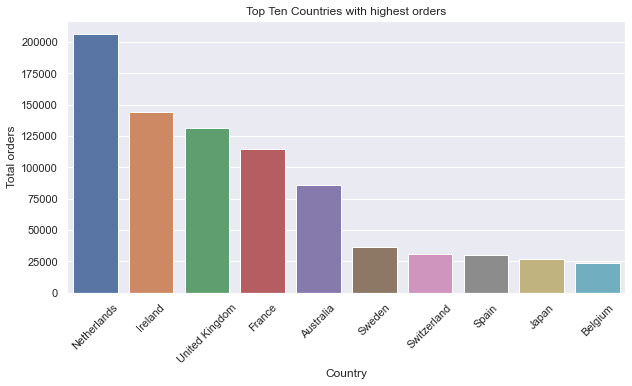

In [35]:
sns.barplot(x=df_sales_country.index, y=df_sales_country['Quantity'])
plt.ylabel('Total orders')
plt.xticks(rotation=45)
plt.title('Top Ten Countries with highest orders')

In [36]:
df_sales_country.head()

,rating,review_count,Quantity,price,total_sale,invoice_time,CustomerID,Year,Month
Country,,,,,,,,,
Netherlands,10520.9,9433663,206441,234816.83,21906803.20,28296,34789439,4867736,16291
Ireland,32482.6,24906000,144354,739205.30,15206618.16,90040,110455961,15123987,57861
United Kingdom,41946.9,33507047,131677,875629.57,12312575.48,115956,123811369,19490905,70058
France,36194.4,32222839,114423,832217.74,11445732.90,100378,105401542,16781494,62353
Australia,5308.5,4956795,86174,122734.25,9805508.61,13876,15143173,2455070,7378


In [37]:
df_sales_customers = df_sales.groupby(by='CustomerID').sum()
df_sales_customers = df_sales_customers.sort_values(by='Quantity',ascending=False)

In [38]:
df_sales_customers = df_sales_customers.iloc[:10]

Text(0.5, 1.0, 'Top Ten Customers')

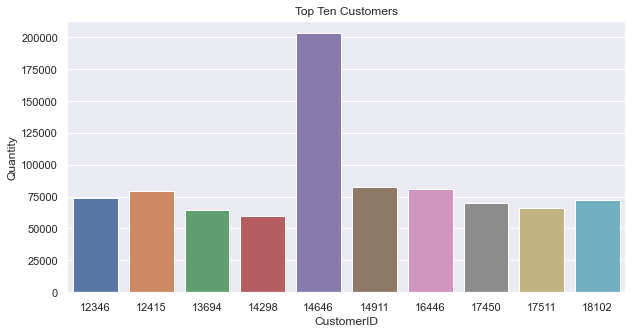

In [39]:
sns.barplot(x=df_sales_customers.index, y=df_sales_customers['Quantity'])
plt.title('Top Ten Customers')

#### EDA Plots: creating world map from a list of country names 

In [40]:
# Step 1: Converting country name to alpha 2 codes

import pycountry

input_countries = df_sales.Country

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in input_countries]

#print(codes)  # prints ['AS', 'CA', 'FR']

In [41]:
df_sales['Country_code'] = codes

In [42]:
df_sales.head()

,ASIN,title,product_type,StockCode,rating,review_count,InvoiceNo,Quantity,price,total_sale,invoice_time,CustomerID,Country,Year,Month,Day of the Week,Country_code
invoice_date,,,,,,,,,,,,,,,,,
2018-12-01,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,78536597,4,496.95,1987.80,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,78536597,4,39.99,159.96,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,78536597,1,12.99,12.99,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,78536597,1,199.99,199.99,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,78536597,1,7.49,7.49,17,18011,Germany,2018,12,Sat,DE


In [44]:
df_countries = df_sales['Country'].unique()
df_countries = pd.DataFrame(df_countries)
df_countries = df_countries.rename(columns={0:'Country'})
df_countries

,Country
0,Germany
1,Ireland
2,Norway
3,Australia
4,France
5,United Kingdom
6,Netherlands
7,Italy
8,Portugal
9,Poland


In [45]:
# Step 2: Get latitude and longitude 

from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(country):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="Amazon Sales")
          
        return geolocator.geocode(country)
      
    except GeocoderTimedOut:
          
        return findGeocode(country)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df_countries["Country"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)


In [46]:
df_countries['latitude'] = latitude
df_countries['longitude'] = longitude

In [47]:
df_countries.head()

,Country,latitude,longitude
0,Germany,51.163818,10.447831
1,Ireland,52.865196,-7.979460
2,Norway,60.500021,9.099972
3,Australia,-24.776109,134.755000
4,France,46.603354,1.888334


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

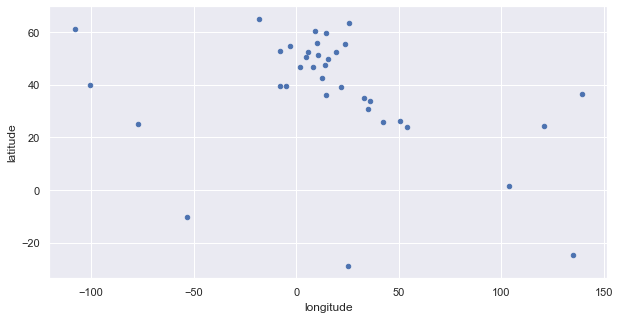

In [48]:
# Create world map with Geopandas

df_countries.plot(x="longitude", y="latitude", kind="scatter", 
        colormap="YlOrRd")

In [49]:
import geopandas as gpd

In [50]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

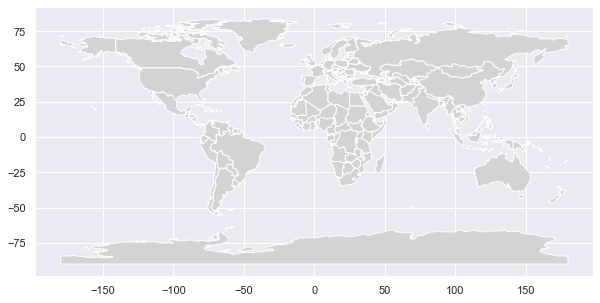

In [51]:
countries.plot(color="lightgrey")

In [236]:
# Plotting the data on the world map

##### KPIs

In [52]:
df_sales.head()

,ASIN,title,product_type,StockCode,rating,review_count,InvoiceNo,Quantity,price,total_sale,invoice_time,CustomerID,Country,Year,Month,Day of the Week,Country_code
invoice_date,,,,,,,,,,,,,,,,,
2018-12-01,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,78536597,4,496.95,1987.80,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,78536597,4,39.99,159.96,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,78536597,1,12.99,12.99,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,78536597,1,199.99,199.99,17,18011,Germany,2018,12,Sat,DE
2018-12-01,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,78536597,1,7.49,7.49,17,18011,Germany,2018,12,Sat,DE


103.21826141849797


Text(0.5, 1.0, 'Average Order Value')

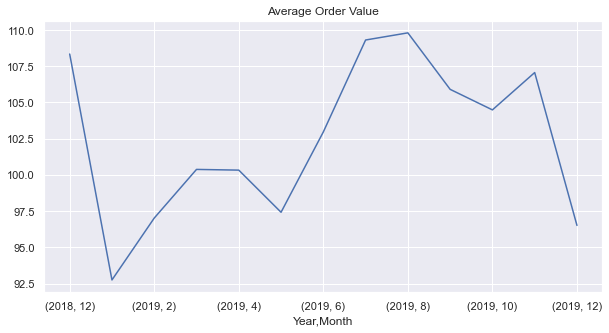

In [53]:
# Average Order Value = Revenue/ Total Orders
df_sales.head()
average_order_value = df_sales.total_sale.sum()/df_sales.Quantity.sum()
print(average_order_value)
df_sales.groupby(by=['Year', 'Month']).apply(lambda x:x.total_sale.sum()/x.Quantity.sum()).plot()
plt.title('Average Order Value')

0.9868518085022048


Text(0.5, 1.0, 'Repeat Purchase Rate')

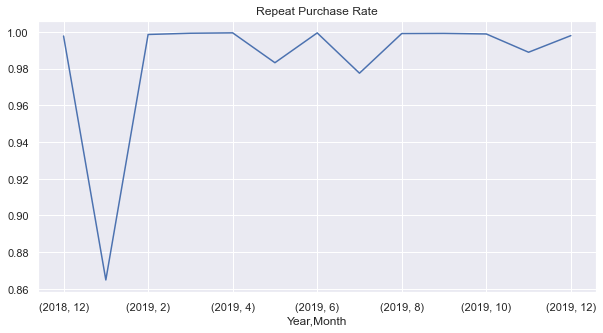

In [54]:
# Repeat purchase rate = Purchase from repeat customer/ total purchases

repeat_customer_ids = df_sales.CustomerID.value_counts()
repeat_customer_ids = repeat_customer_ids[repeat_customer_ids > 1].index

repeat_purchase_rate = df_sales[df_sales.CustomerID.isin(repeat_customer_ids)].total_sale.sum()/df_sales.total_sale.sum()
print(repeat_purchase_rate)

df_sales.groupby(['Year', 'Month']).apply(lambda x: x[x.CustomerID.isin(repeat_customer_ids)].total_sale.sum()/x.total_sale.sum()).plot()

plt.title('Repeat Purchase Rate')

0.32749481447338097


Text(0.5, 1.0, 'Purchase frequency')

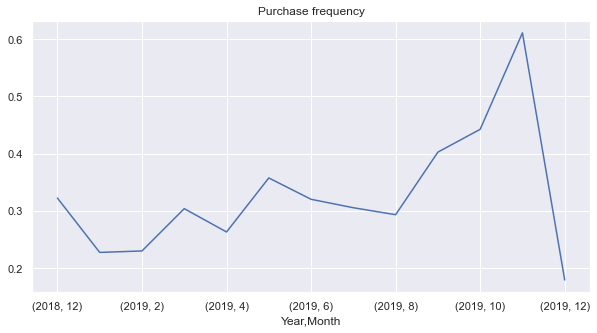

In [297]:
# Purchase frequency = Total Num of orders/Total num of unique customers 

num_months = len(df_sales.loc[:, ['Year', 'Month']].value_counts().index.to_list())
num_customers = df_sales.CustomerID.nunique()
purchase_frequency = df_sales.InvoiceNo.nunique()/num_customers/num_months
print(purchase_frequency)

df_sales.groupby(by=['Year', 'Month']).apply(lambda x: x.InvoiceNo.nunique()/num_customers).plot()

plt.title('Purchase frequency')